<a href="https://colab.research.google.com/github/trachtok/dspracticum2020_data/blob/main/assignment07/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language processing - text generator
*Kája Trachtová, Michaela Kecskésová, Martin Špilar, Dagmar Al Tukmachi*

+ goal of this assignment is to generate text based on some initial text
+ done using LSTM

## Load libraries and input data

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import re

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = '/content/drive/My Drive/text_ML2.txt'
path2 = '/content/drive/My Drive/Babis.txt'
# !head "/content/drive/My Drive/text_ML2.txt"

In [7]:
# read input data
file = open(path1, "r")
data = file.read()
file.close()
print(data[:50])

Dobrý den, dámy a pánové. Vláda dnes schválila žád


In [9]:
file = open(path2, "r")
data_tmp = file.read()
file.close()
print(data_tmp[:50])

Takže dobrý den, dámy a pánové, vážení spoluobčané


In [10]:
data += data_tmp

## Data preprocessing

In [12]:
# if input text contains empty lines -> remove, also get rid of empty space after end of sequences
data = data.replace('\n', "").replace('. ', '.')
# split text into array based on sentences
m = re.search('\.[A-Z]', data)
while m:
  position = m.span()[0]
  data = data[:position] + "&" + data[position + 1 :]
  m = re.search('\.[A-Z]', data)
corpus = data.lower().split('&')
print(corpus[:5])

['dobrý den, dámy a pánové', 'vláda dnes schválila žádost poslanecké sněmovně o vyslovení souhlasu s prodloužením nouzového stavu v souvislosti s epidemií covid-19, a to do 3.prosince 2020', 'důvodem je samozřejmě nutnost prodloužit ta přijatá krizová opatření, bez kterých stávající pandemii nemůžeme zvládnout', 'takže sněmovna projedná naši žádost v pátek od 9 hodin a já pevně doufám, že opozice pochopí vážnost situace a tuto žádost schválí', 'je to, myslím si, velice důležité']


## Tokenization

In [13]:
# tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print("Total words: ", total_words)

Total words:  4178


In [14]:
# text to integers
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i + 1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[1:10])

[[126, 109, 136], [126, 109, 136, 1], [126, 109, 136, 1, 137], [47, 32], [47, 32, 797], [47, 32, 797, 446], [47, 32, 797, 446, 979], [47, 32, 797, 446, 979, 405], [47, 32, 797, 446, 979, 405, 12]]


In [15]:
# padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
print(input_sequences[1:5])
print(max_sequence_len)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 126 109
  136]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 126 109 136
    1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   

## Model training

In [16]:
# create predictors and label
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
#model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
1062/1062 [==============================] - 17s 16ms/step - loss: 6.5156 - accuracy: 0.0830
Epoch 2/100
1062/1062 [==============================] - 17s 16ms/step - loss: 4.7184 - accuracy: 0.1977
Epoch 3/100
1062/1062 [==============================] - 18s 17ms/step - loss: 3.4107 - accuracy: 0.3339
Epoch 4/100
1062/1062 [==============================] - 18s 17ms/step - loss: 2.6002 - accuracy: 0.4445
Epoch 5/100
1062/1062 [==============================] - 18s 17ms/step - loss: 2.1479 - accuracy: 0.5190
Epoch 6/100
1062/1062 [==============================] - 17s 16ms/step - loss: 1.8467 - accuracy: 0.5755
Epoch 7/100
1062/1062 [==============================] - 17s 16ms/step - loss: 1.6610 - accuracy: 0.6120
Epoch 8/100
1062/1062 [==============================] - 17s 16ms/step - loss: 1.5340 - accuracy: 0.6359
Epoch 9/100
1062/1062 [==============================] - 17s 16ms/step - loss: 1.4068 - accuracy: 0.6584
Epoch 10/100
1062/1062 [==============================]

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

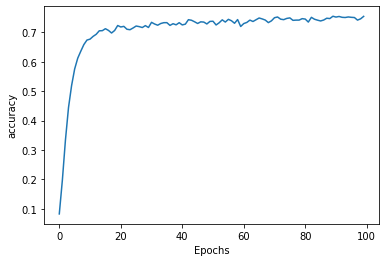

In [19]:
plot_graphs(history, 'accuracy')


In [21]:
seed_text = "Dámy a pánové"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Dámy a pánové ten obrovský psychický školství složitá hodinu porovnatelných zásadní informace že různé předpovědi ale myslím že to zase není taková senzace aby se to vyzkouší bude znovu opatření lidí vlastně nový zákon distančního volný 1 1 respirátorů 1 milionu respirátorů ffp2 máme rukavice 14 5 milionu a tak dále podporovat dovolené a že vláda rozhodla o kompenzacích pro všechny cizince s výjimkou případů uvedených v bodu y i písmeno a až v tom manuálu že to tak bychom se měli vrátit do toho normálního režimu jaký jsme měli před tím než přišel vir závislá návrh využití prostředků z nouzového stavu do
